This is assignment #3 of the Machine Learning course
Done by Wania Naeem, 22i-2369

Part 1 - Model Training ------------------

-> Dataset (Kaggle - Ice cream sold vs Temperature): https://www.kaggle.com/datasets/mirajdeepbhandari/polynomial-regression

- Features: Hours Studied, Previous Scores, Extracurricular Activities, Sleep Hours, Sample Question Papers Practiced.
- Output: Performace Index

In [12]:
#  kaggle datasets download -d mirajdeepbhandari/polynomial-regression

# Extracting the dataset after downloading it with the above command
import zipfile

with zipfile.ZipFile("polynomial-regression.zip", 'r') as zip_ref:
    zip_ref.extractall("ice-cream_data")


Dataset visualization

In [13]:
import os
import pandas as pd

dataset = pd.read_csv("ice-cream_data/Ice_cream selling data.csv")
dataset.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


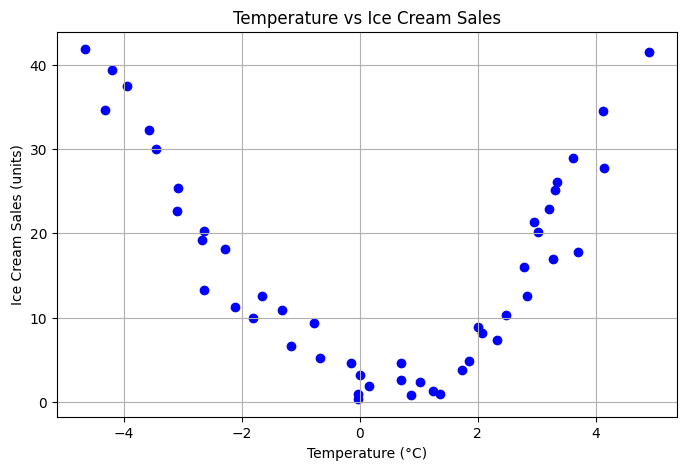

In [19]:
# Now to plot the scatter plot + regression line of this data to get an idea of the trend.
# This will be done on each feature.

from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

np.random.seed(42)
target = 'Ice Cream Sales (units)'
feature = 'Temperature (°C)'

plt.figure(figsize=(8, 5))
plt.scatter(dataset[feature], dataset[target], color='blue')
plt.title('Temperature vs Ice Cream Sales')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.grid(True)
plt.show()


In [27]:
# Since the plot gives a polynomial shape for the dataset, I will apply Polynomial Regression on this dataset

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = dataset[feature].values.reshape(-1,1)
y = dataset[target].values.reshape(-1,1)


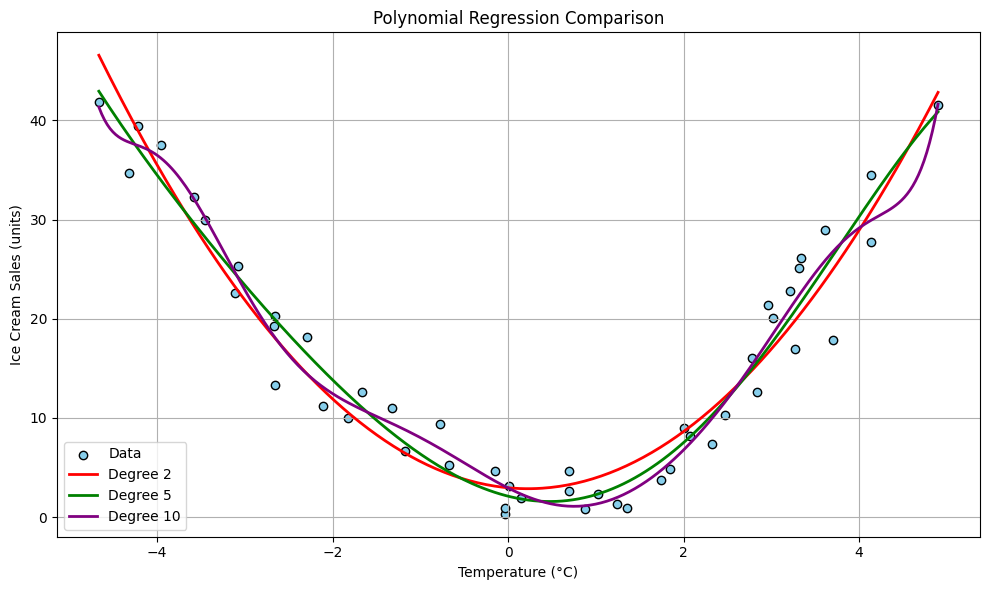

In [34]:
# Plotting the 3 models and dataset scatter plot on the same graph

X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
colors = {2: 'red', 5: 'green', 10: 'purple'}
labels = {2: 'Degree 2', 5: 'Degree 5', 10: 'Degree 10'}

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='skyblue', edgecolor='black', label='Data')

for degree in [2,5,10]:
    poly = PolynomialFeatures(degree)
    X_range_poly = poly.fit_transform(X_range)

    model = LinearRegression()
    model.fit(poly.fit_transform(X), y)
    
    y_range_pred = model.predict(X_range_poly)

    plt.plot(X_range, y_range_pred, color=colors[degree], label=labels[degree], linewidth=2)

# Final touches
plt.title('Polynomial Regression Comparison')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()